4.9 Task Pt.2 

 Step 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df_ords_prods_customers_merge =pd.read_pickle(r"C:\Users\Owner\Downloads\orders_products_customers_merged_grouped.pkl")

 Step 3 - Create a histogram of the order_hour_of_day column

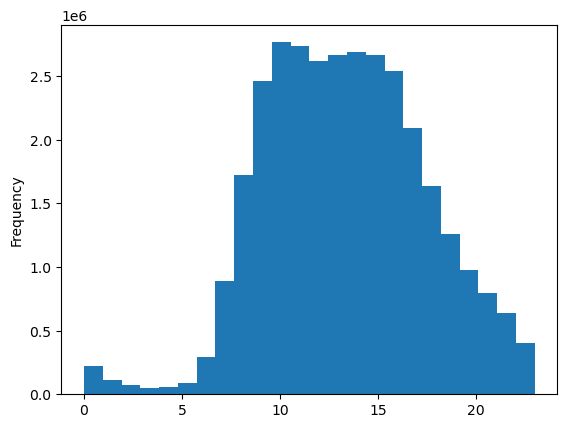

In [6]:
hist = df_ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 24)

Observation: The day has 24 hours each bin shows the frequency of the orders every hour. The peak orders are hour 10 and 15. Meaning that customers favor ordering late mornings and afternnons. While there are signifcantly less during the night time hours

Step 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the loyalty_flag column

In [9]:
df_ords_prods_customers_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   product_id                  int64   
 1   product_name                object  
 2   aisle_id                    int64   
 3   department_id               int64   
 4   prices                      float64 
 5   order_id                    int64   
 6   user_id                     int64   
 7   eval_set                    object  
 8   order_number                int64   
 9   orders_day_of_week          int64   
 10  order_hour_of_day           int64   
 11  days_since_prior_order      float64 
 12  add_to_cart_order           int64   
 13  reordered                   int64   
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busiest_days                object  
 17  busiest_period_of_day       object  
 18  max_order                   int64   
 19

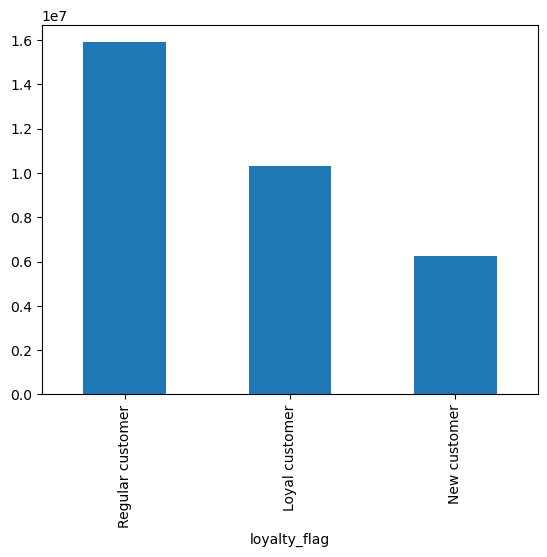

In [10]:
bar = df_ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

Step 5 - Check whether there's a difference in the prices column depending on the hour of the day

In [12]:
# Creating a random sample set
np.random.seed(4)

In [13]:
# 70/30 ratio
dev = np.random.rand(len(df_ords_prods_customers_merge)) <= 0.7


In [14]:
# Store 70% of the sample in the large dataframe
large = df_ords_prods_customers_merge[dev]

In [15]:
# Store 30% of the sample in the dataframe small\n",
small = df_ords_prods_customers_merge[~dev]

In [16]:
len(df_ords_prods_customers_merge)

32434212

In [17]:
len(large) + len( small)

32434212

check for consistency ^

In [19]:
# new dataframe that has only the prices and order_hour_of_day columns from 'small' subset
df_2 = small[['order_hour_of_day','prices']]

In [20]:
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32434188,8,13.5
32434191,21,13.5
32434199,16,13.5
32434204,4,13.5


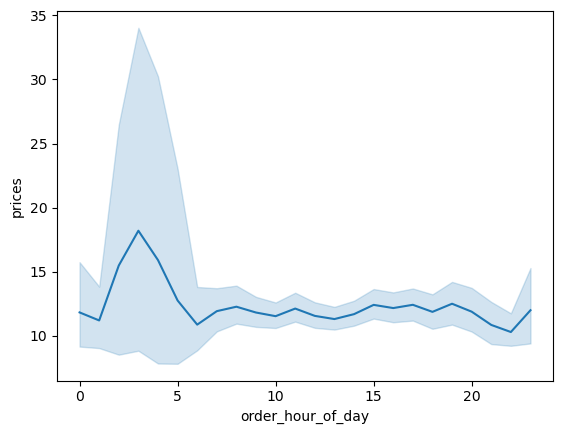

In [21]:
# line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

Step 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [23]:
# epxploring relationship between age and number of dependents column from small subset
df_3 = small[['age','n_dependants']]

In [24]:
df_3

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
...,...,...
32434188,31,2
32434191,36,3
32434199,58,1
32434204,20,2


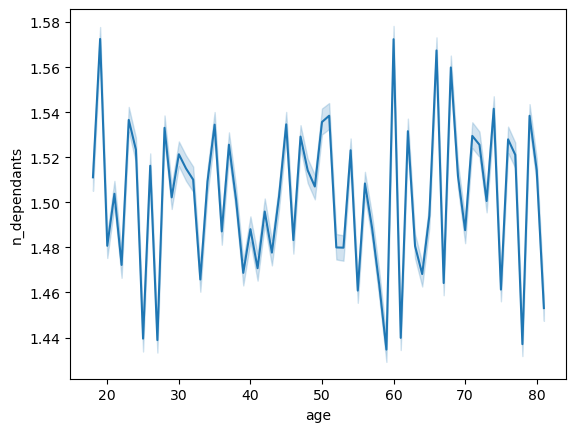

In [25]:
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

observation: no clear pattern, varies too much

Step 7 -  also need to explore whether there's a connection between age and income

In [28]:
# new dataframe that contains age and income columns from small subset
df_4 = small[['age','income']]

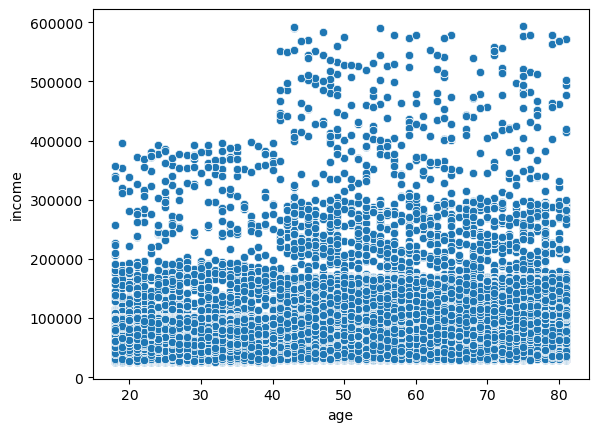

In [29]:
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

There is a steep step at age 40, with an increase in income

Step 8 - exporting

In [53]:
import os
path = os.path.join('..', '04 Analysis', 'Visualizations')

In [55]:
hist.figure.savefig(os.path.join(path,'hist_order_hour_of_day.png'))

In [57]:
bar.figure.savefig(os.path.join(path,'bar_loyalty_flag.png'))

In [61]:
line.figure.savefig(os.path.join(path,'line_price_hour_of_day.png'))

In [65]:
line_2.figure.savefig(os.path.join(path,'line_age_number_of_dependents.png'))

In [67]:
scatterplot.figure.savefig(os.path.join(path,'scatter_plot_age_income.png'))